# Sprint 1: Data analysis and supervised learning

## Opmerkingen dataset

* Complaint volume moet in verband worden gebracht met de grootte en het marktaandeel van het bedrijf.
Een bedrijf met een groot aantal klanten zal bijvoorbeeld meer klachten hebben dan één met een klein aantal klanten.

## Inlezen dataset

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

def read_all_complaints() :
    # Store all the data of the complaints in an array of maps. (amount of maps = amount of complaints)
    all_complaints = []
    with open('data/complaints-100.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print("All the information stored about a complaint:")
                #for category in row:
                    #print("-" + category)
                line_count += 1
            else: 
                complaint=[]
                full_complaint = " ".join(row[1:5])
                complaint.append(row[1])
                complaint.append(full_complaint.lower())
                complaint.append(row[5])
                #complaint.append(row[2])
                #complaint.append(row[3])
                #complaint.append(row[4])
                all_complaints.append(complaint)
                line_count += 1
        print(f'File processed of {line_count} lines.')
        return all_complaints
    csv_file.close()
complaints = read_all_complaints()

#df = pd.DataFrame(complaints, columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue']) 
df = pd.DataFrame(complaints, columns = ['Product','Complaint','Consumer complaint narrative']) 
print("Number of complaints in dataset: ",df.shape[0])



All the information stored about a complaint:
File processed of 120 lines.
Number of complaints in dataset:  119


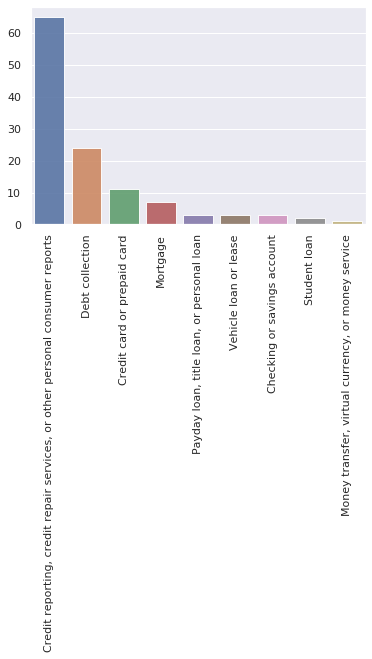

In [113]:
product_count = df['Product'].value_counts()
product_count 
sns.set(style="darkgrid")
ax = sns.barplot(product_count.index, product_count.values, alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [114]:
cat_complaints = df.copy()
#cat_complaints = pd.get_dummies(cat_complaints, columns=['Product'], prefix = ['prod'])
#cat_complaints
df

,Product,Complaint,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...","credit reporting, credit repair services, or o...",I have complained many times that the credit r...
1,Debt collection,debt collection i do not know false statements...,please review the current fraud account and al...
2,Debt collection,debt collection i do not know attempts to coll...,Called multiple times over the years for a deb...
3,Debt collection,debt collection other debt attempts to collect...,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...","credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...
...,...,...,...
114,Debt collection,debt collection i do not know attempts to coll...,I am a victim of identity theft and this debt ...
115,Checking or savings account,checking or savings account checking account m...,Over the last two years I have had egregious d...
116,Credit card or prepaid card,credit card or prepaid card general-purpose cr...,On XX/XX/2018 I received a call from American ...
117,"Credit reporting, credit repair services, or o...","credit reporting, credit repair services, or o...",On or before XX/XX/XXXX XXXX XXXX XXXX offered...


In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# vaak staat het product voor het sub product nog eens, dus die ook proberen wegkrijgen met de parameters
# reporting en problem mag er bv niet instaan
count_vect = CountVectorizer(
    stop_words="english",
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    ngram_range=(1,3),
    min_df=1,
    max_df=1.0
)
X_train_counts = count_vect.fit_transform(df["Consumer complaint narrative"])

tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

In [143]:
feature_names=count_vect.get_feature_names()
print(feature_names[:10])

print(len(feature_names))
print(X_train_tf.shape)

['aargon', 'aargon agency', 'aargon agency xxxx', 'abide', 'abide fight', 'abide fight customers', 'ability', 'ability obtain', 'ability obtain credit', 'ability query']
20948
(119, 20948)


In [146]:
print(df.at[0, "Consumer complaint narrative"])
features = X_train_tf[0]

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

I have complained many times that the credit reporting by Experian is inaccurate and they always just say wait awhile, it will be fixed later and yet it never is. They are incapable of providing accurate information and do not take responsibility for their errors. This is a fake service, designed to serve only their needs and not the consumer 's needs. I can not find any way to cancel and when I mention it on the phone I am immediately disconnected. 
I want to be a part of the class action lawsuit against them since they are responsible for reducing my credit rating, releasing my personal information and my fraud complaints have multiplied over the last 2-3 years. I have spoken to many ineffectual and uncaring agents on their phone support lines and am just tired of paying them to degrade my credit for random incorrect reasons ( like I paid a utility bill with another bank account ) and not raising it for legitimate things like paying off thousands of dollars of debt, getting 3 new cre

,tfidf
new credit,0.125379
needs,0.115400
credit,0.106593
just,0.103064
dollars,0.102828
paying,0.088362
like,0.079311
new,0.075789
phone,0.068709
want class,0.062689
